In [18]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-09-04 05:37:02--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

26427392it [00:00, 79830404.02it/s]                              


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 528267.99it/s]
  5%|▍         | 212992/4422102 [00:00<00:02, 2068349.40it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:00, 26517865.39it/s]                           
8192it [00:00, 139462.84it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

In [0]:
data_iter_training = iter(trainloader)
images_training, labels_training = data_iter_training.next()

In [7]:
images_training.shape

torch.Size([64, 1, 28, 28])

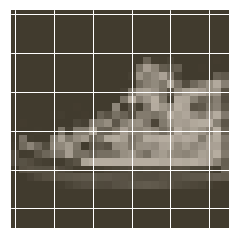

In [26]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [0]:
from torch import nn, optim
import torch.nn.functional as F

**Advantages:**

Sigmoid: not blowing up activation
Relu : not vanishing gradient
Relu : More computationally efficient to compute than Sigmoid like functions since Relu just needs to pick max(0,𝑥) and not perform expensive exponential operations as in Sigmoids
Relu : In practice, networks with Relu tend to show better convergence performance than sigmoid. (Krizhevsky et al.)


**Disadvantage:**

Sigmoid: tend to vanish gradient (cause there is a mechanism to reduce the gradient as "𝑎" increase, where "𝑎" is the input of a sigmoid function. Gradient of Sigmoid: 𝑆′(𝑎)=𝑆(𝑎)(1−𝑆(𝑎)). When "𝑎" grows to infinite large , 𝑆′(𝑎)=𝑆(𝑎)(1−𝑆(𝑎))=1×(1−1)=0).

Relu : tend to blow up activation (there is no mechanism to constrain the output of the neuron, as "𝑎" itself is the output)

Relu : Dying Relu problem - if too many activations get below zero then most of the units(neurons) in network with Relu will simply output zero, in other words, die and thereby prohibiting learning.(This can be handled, to some extent, by using Leaky-Relu instead.)

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [30]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5130486201598192
Training loss: 0.3885059653441789
Training loss: 0.35512880079432335
Training loss: 0.3365172341958419
Training loss: 0.31614006655429727


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


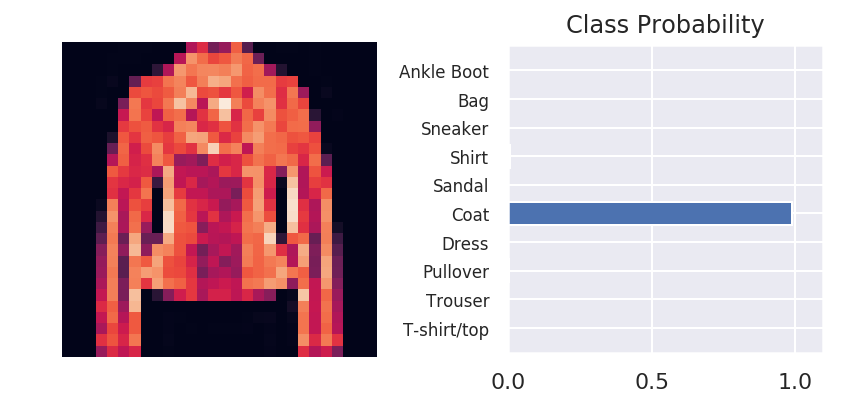

In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))

view_classify(img, ps, version='Fashion')

In [60]:
dataiter = iter(testloader)
images, labels = dataiter.next()

count = 0
total = 0
for index,img in enumerate(images):
  ps = torch.exp(model(img))
  a = ps
  pred = np.argmax(a.detach().numpy())
  if pred==labels[index]:
    count+=1
  total+=1
  
print(count/total)

0.921875
